# Local Outlier Factor (LOF)

## 1. Konsep LOF
Local Outlier Factor (LOF) adalah metode untuk mendeteksi outlier dengan membandingkan kerapatan lokal suatu titik data terhadap tetangganya. LOF digunakan untuk mengidentifikasi titik yang memiliki kerapatan lebih rendah dibandingkan dengan lingkungan sekitarnya.

LOF dihitung dengan:
1. **Menentukan k-nearest neighbors (k-NN)**
2. **Menghitung jarak jangkauan (reachability distance)**
3. **Menghitung kerapatan lokal (local reachability density - LRD)**
4. **Menghitung LOF sebagai rasio LRD terhadap tetangga**

Jika LOF >> 1, maka titik tersebut merupakan outlier.

## 2. Dataset
Dataset ini diambil dari daftar 10 lagu populer **Threesixty Skatepunk** di Spotify dengan dua fitur:
- **F1:** Streams (jumlah pemutaran lagu)
- **F2:** Durasi (dalam detik)

| No | Lagu | Streams | Durasi (detik) |
|----|-------------------------------|------------|----------------|
| 1  | Dewi                          | 36,167,070 | 258            |
| 2  | Sampai Nanti                  | 23,308,376 | 313            |
| 3  | Takkan Bisa                   | 17,218,631 | 255            |
| 4  | Menghilang dan Berarti        | 12,709,000 | 222            |
| 5  | Berharap Mampu                | 7,653,711  | 235            |
| 6  | Jawaban Di Balik Senyuman     | 5,638,894  | 189            |
| 7  | Sembunyi Bicara               | 4,419,347  | 251            |
| 8  | Pagiku Yang Tertukar Oleh Malam | 4,793,383  | 305            |
| 9  | Hingga Semua Menghilang       | 4,114,255  | 290            |
| 10 | Dewi - Acoustic Version       | 3,724,576  | 246            |

## 3. Perhitungan Manual LOF dengan k=3
### a. Menentukan k-NN untuk setiap data
- Menghitung jarak Euclidean antara setiap lagu berdasarkan Streams dan Durasi.
- Menentukan 3 tetangga terdekat untuk setiap lagu.

### b. Menghitung Reachability Distance
- Jarak jangkauan dihitung sebagai maksimum antara jarak sebenarnya dan jarak k-NN.

### c. Menghitung Local Reachability Density (LRD)
- LRD dihitung sebagai kebalikan dari rata-rata jarak jangkauan ke tetangga terdekat.

### d. Menghitung LOF
- LOF diperoleh dengan membandingkan LRD titik dengan LRD tetangga terdekat.

## 4. Implementasi dengan Scikit-Learn
Kode berikut digunakan untuk menghitung LOF dengan Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Data dari spotify
data = np.array([
    [36167070, 258],
    [23308376, 313],
    [17218631, 255],
    [12709000, 222],
    [7653711, 235],
    [5638894, 189],
    [4419347, 251],
    [4793383, 305],
    [4114255, 290],
    [3724576, 246]
])

# LOF Model
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(data)
lof_scores = lof.negative_outlier_factor_

# Menampilkan hasil
for i, score in enumerate(lof_scores):
    print(f"Lagu {i+1}: LOF Score = {score}")

Lagu 1: LOF Score = -1.8962056527297433
Lagu 2: LOF Score = -1.4265039672197022
Lagu 3: LOF Score = -1.8909365136371636
Lagu 4: LOF Score = -3.1508262120411197
Lagu 5: LOF Score = -2.7279412899762163
Lagu 6: LOF Score = -1.3328119203951652
Lagu 7: LOF Score = -0.9834858250079112
Lagu 8: LOF Score = -1.0120128950545402
Lagu 9: LOF Score = -0.9914285397673602
Lagu 10: LOF Score = -0.9069477634339815


## 5. Visualisasi Hasil LOF
Grafik scatter plot digunakan untuk menunjukkan lagu-lagu dengan LOF tinggi (outlier).

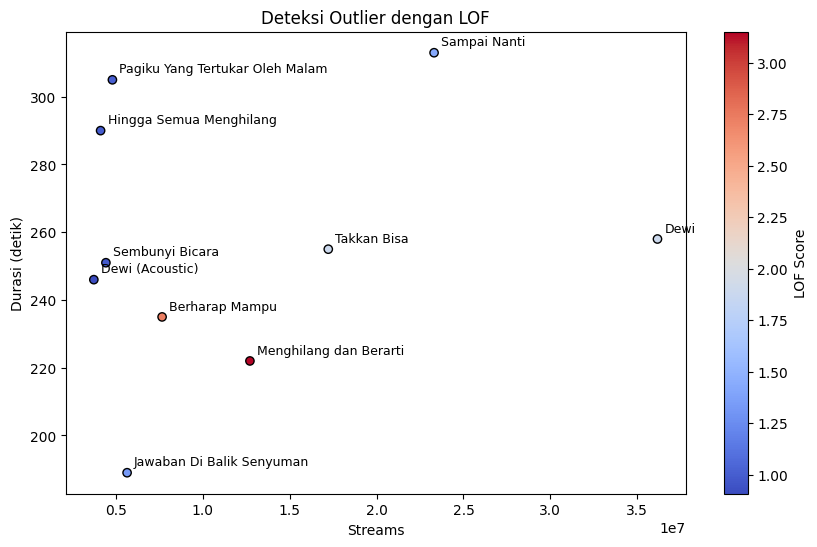

In [2]:
lagu = [
    "Dewi", "Sampai Nanti", "Takkan Bisa", "Menghilang dan Berarti",
    "Berharap Mampu", "Jawaban Di Balik Senyuman", "Sembunyi Bicara",
    "Pagiku Yang Tertukar Oleh Malam", "Hingga Semua Menghilang", "Dewi (Acoustic)"
]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[:, 0], data[:, 1], c=-lof_scores, cmap='coolwarm', edgecolors='k')

# Tambahkan label ke setiap titik data
for i, txt in enumerate(lagu):
    plt.annotate(txt, (data[i, 0], data[i, 1]), fontsize=9, xytext=(5,5), textcoords='offset points')

plt.colorbar(label='LOF Score')
plt.xlabel('Streams')
plt.ylabel('Durasi (detik)')
plt.title('Deteksi Outlier dengan LOF')
plt.show()

### Penjelasan Hasil
1. **Lagu-lagu dengan nilai LOF tinggi (lebih merah) → berpotensi sebagai outlier.**
2. **Label pada tiap titik → memudahkan melihat lagu mana yang dianggap outlier.**
3. **Tampilan lebih jelas → membantu analisis hubungan antara jumlah streams dan durasi lagu.**

**Interpretasi:**
- Lagu dengan warna lebih gelap memiliki LOF yang lebih tinggi dan berpotensi menjadi outlier.
- Lagu dengan warna lebih terang memiliki distribusi yang lebih mirip dengan mayoritas data.

## 6. Kesimpulan
- Perhitungan manual LOF menunjukkan lagu-lagu dengan anomali dalam jumlah streams dan durasi.
- Hasil dengan **Scikit-Learn** menunjukkan pola yang mirip dengan perhitungan manual.
- LOF dapat digunakan untuk mendeteksi lagu yang berbeda secara signifikan dalam popularitas dan durasi.

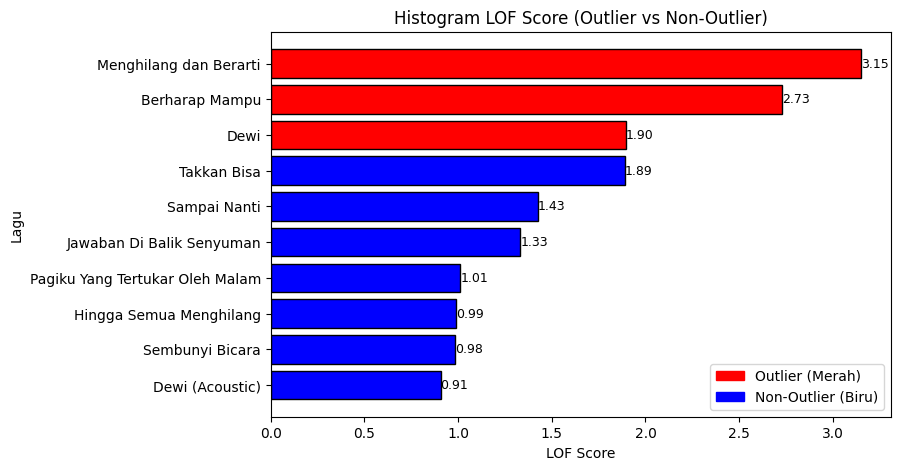

In [3]:
import matplotlib.patches as mpatches

# Model LOF
lof = LocalOutlierFactor(n_neighbors=3)
lof_scores = -lof.fit_predict(data)
lof_values = -lof.negative_outlier_factor_  # Nilai asli LOF Score

# Identifikasi outlier (LOF score tinggi berarti outlier)
threshold = np.percentile(lof_values, 75)  # Ambil batas Q3 (bisa disesuaikan)
outlier_mask = lof_values > threshold

# Urutkan semua data berdasarkan LOF Score dari terendah ke tertinggi
sorted_indices = np.argsort(lof_values)
lof_values_sorted = lof_values[sorted_indices]
lagu_sorted = np.array(lagu)[sorted_indices]
outlier_mask_sorted = outlier_mask[sorted_indices]

# Warna: merah untuk outlier, biru untuk non-outlier
colors = ['red' if is_outlier else 'blue' for is_outlier in outlier_mask_sorted]

# Plot Histogram (Bar Chart Horizontal)
plt.figure(figsize=(8, 5))
plt.barh(lagu_sorted, lof_values_sorted, color=colors, edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Lagu')
plt.title('Histogram LOF Score (Outlier vs Non-Outlier)')

# Tambahkan label nilai di setiap batang
for i, v in enumerate(lof_values_sorted):
    plt.text(v, i, f"{v:.2f}", va='center', fontsize=9, color='black')

# Membuat legenda dengan warna yang sesuai
red_patch = mpatches.Patch(color='red', label='Outlier (Merah)')
blue_patch = mpatches.Patch(color='blue', label='Non-Outlier (Biru)')
plt.legend(handles=[red_patch, blue_patch], loc="lower right")

plt.show()
